In [1]:
# 引入所需要的全部包
from sklearn.model_selection import train_test_split # 数据划分的类
from sklearn.linear_model import LinearRegression # 线性回归的类
from sklearn.preprocessing import StandardScaler # 数据标准化

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [6]:
# 加载数据
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣机用电功率、热水器用电功率
fpath = './data/household_power_consumption_1000.txt'
df = pd.read_csv(fpath,sep=';')

In [10]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [41]:
## 创建一个时间函数格式化字符串
def date_format(dt):
    # dt显示是一个series/tuple；dt[0]是date，dt[1]是time
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [37]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [51]:
## 需求：构建时间和功率之间的映射关系，可以认为：特征属性为时间；目标属性为功率值。
# 获取x和y变量, 并将时间转换为数值型连续变量
X0 = df.iloc[:,:2]
# apply对DataFrame中的数据采用给定的函数进行处理，具体是行数据还是列数据，看参数axis；
# 如果axis为1，那么表示按行进行数据处理； 如果axis为0，表示按照列进行数据处理
X = X0.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = df['Global_active_power']

In [65]:
## 对数据集进行测试集合训练集划分
# X：特征矩阵(类型一般是DataFrame)
# Y：特征对应的Label标签(类型一般是Series)
# test_size: 对X/Y进行划分的时候，测试集合的数据占比, 是一个(0,1)之间的float类型的值
# random_state: 数据分割是基于随机器进行分割的，该参数给定随机数种子；给一个值(int类型)的作用就是保证每次分割所产生的数数据集是完全相同的
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [66]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print("训练集上R2:",lr.score(X_train, y_train))
print("测试集上R2:",lr.score(X_test, y_test))

训练集上R2: 0.24409311805909026
测试集上R2: 0.12551628513735846


In [70]:
mes = np.average((yhat-y_test)**2)
rmes = np.sqrt(mes)
print(mes, rmes)

1.3551109899543778 1.164092345973625


In [72]:
print(lr.coef_)
print(lr.intercept_)

[ 0.00000000e+00 -1.66533454e-16 -1.41588166e+00 -9.34953243e-01
 -1.02140756e-01  0.00000000e+00]
2.4454375000000024


In [77]:
## 模型保存/持久化
# 在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是直接将预测结果输出
# 模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib

# 保存模型要求给定的文件所在的文件夹比较存在
joblib.dump(ss, "./result/data_ss.model") ## 将标准化模型保存
joblib.dump(lr, "./result/data_lr.model") ## 将模型保存

['./result/data_lr.model']

In [85]:
ss1 = joblib.load('./result/data_ss.model')
lr1 = joblib.load('./result/data_lr.model')

In [88]:
data1 = [[2006, 12, 17, 12, 25, 0]]
data1 = ss1.transform(data1)
lr1.predict(data1)

array([1.16996393])

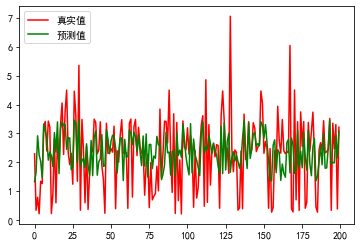

In [94]:
x = np.arange(len(X_test))
plt.plot(x,y_test,'r-',label='真实值')
plt.plot(x,yhat,'g-',label='预测值')
plt.legend(loc='upper left')
plt.show()

In [114]:
## 功率和电流之间的关系
X = df.iloc[:,2:4]
Y = df.iloc[:,5]
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X,Y, test_size=0.2, random_state=0)
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [105]:
Y2hat = lr2.predict(X2_test)

In [107]:
print(lr2.coef_)
print(lr2.intercept_)

[4.20324605 1.36676171]
0.0


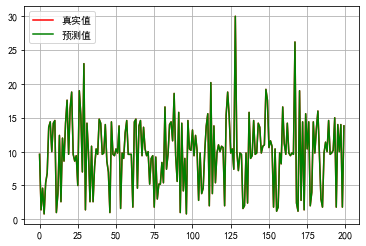

In [109]:
x = np.arange(len(X2_test))
plt.plot(x, Y2_test, 'r-', label='真实值')
plt.plot(x, Y2_test, 'g-', label='预测值')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

ValueError: shapes (800,2) and (6,) not aligned: 2 (dim 1) != 6 (dim 0)

In [138]:
## 功率和电流之间的关系
X = df.iloc[:,2:4]
Y2 = df.iloc[:,5]

## 数据分割
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X, Y2, test_size=0.6, random_state=0)

In [131]:
print(X2_train.shape,Y2_train.shape)     #numpy 存的是array 格式，不是严格意义上的矩阵 (800, 2) (800,)
X2_train

(200, 2) (200,)


,Global_active_power,Global_reactive_power
152,3.202,0.078
528,0.306,0.128
696,2.294,0.000
621,0.436,0.096
461,5.282,0.150
598,2.338,0.000
139,3.378,0.154
749,0.254,0.000
260,3.424,0.046
961,2.438,0.066


In [139]:
X2_train, Y2_train = np.mat(X2_train), np.mat(Y2_train)   #转换成标准矩阵
print(X2_train.shape,Y2_train.shape)     #矩阵的形状(800, 6) (1, 800)
X2_train

(800, 6) (1, 400)


matrix([[ 0.        ,  0.        ,  0.81862454, -0.83774203,  1.23299681,
          0.        ],
        [ 0.        ,  0.        ,  0.81862454, -1.20979622,  0.82733427,
          0.        ],
        [ 0.        ,  0.        , -1.22156123,  1.39458314,  1.52275577,
          0.        ],
        ...,
        [ 0.        ,  0.        ,  0.81862454, -0.96176009,  1.3489004 ,
          0.        ],
        [ 0.        ,  0.        ,  0.81862454, -1.08577816,  0.76938248,
          0.        ],
        [ 0.        ,  0.        ,  0.81862454, -0.83774203,  1.05914144,
          0.        ]])

In [140]:
theta = (X2_train.T * X2_train).I * X2_train.T * Y2_train


LinAlgError: singular matrix

[[-2.   1. ]
 [ 1.5 -0.5]]


matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])